In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Rescaling, Embedding, Reshape, Conv2D, MaxPooling2D, Flatten
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ModelCheckpoint
from IPython.display import SVG

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.data import AUTOTUNE

#This is from someone's git repo. They created a py package that will plot the loss function as your model trains
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [3]:
img_folder = 'C:/Users/louisa/Documents/GitHub/DeCoreIdea/decore_style'

Like any good data scientist, one needs to start things off with some EDA. The function below chooses 5 random images from a specified class using the corpus file path. It then uses matplotlib to print them out with the filename as the title. The filenames should probably be modified to be more uniform. 

In [4]:
def random_img(corpus_path, class_str, num=5, size=(20,20)):
    class_path = corpus_path + class_str
    plt.figure(figsize=size);
    for i in range(num):
        file = random.choice(os.listdir(class_path))
        image_path= os.path.join(class_path, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,5,i+1)
        ax.title.set_text(file)
        plt.imshow(img);
    return 

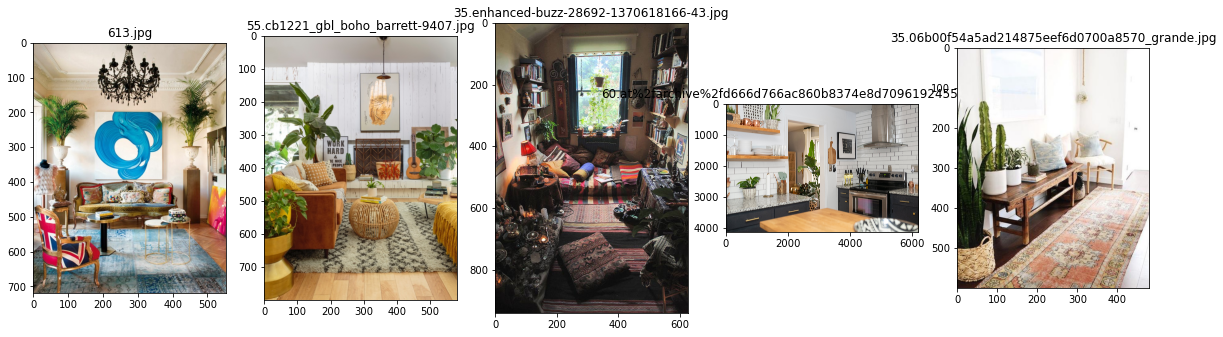

In [5]:
random_img(img_folder, class_str = '/bohemian')

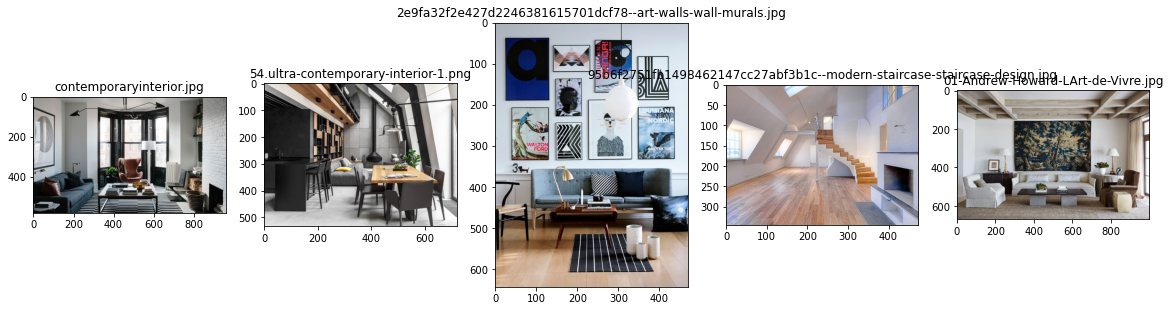

In [6]:
random_img(img_folder, class_str = '/contemporary')

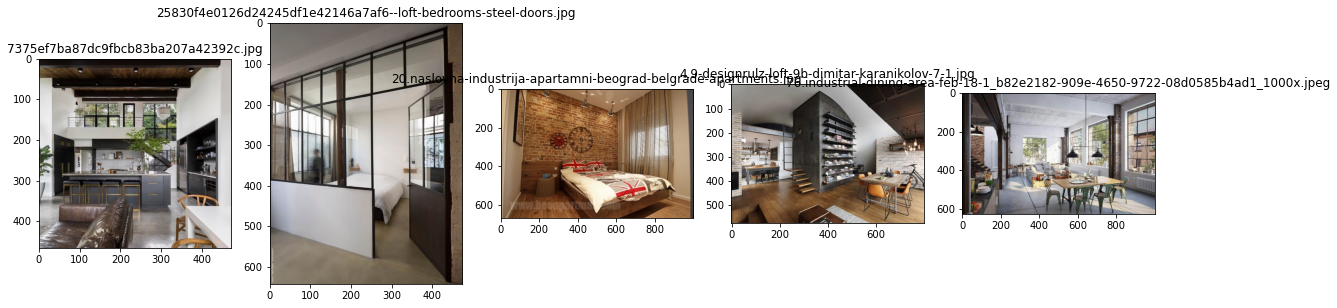

In [7]:
random_img(img_folder, class_str = '/industrial')

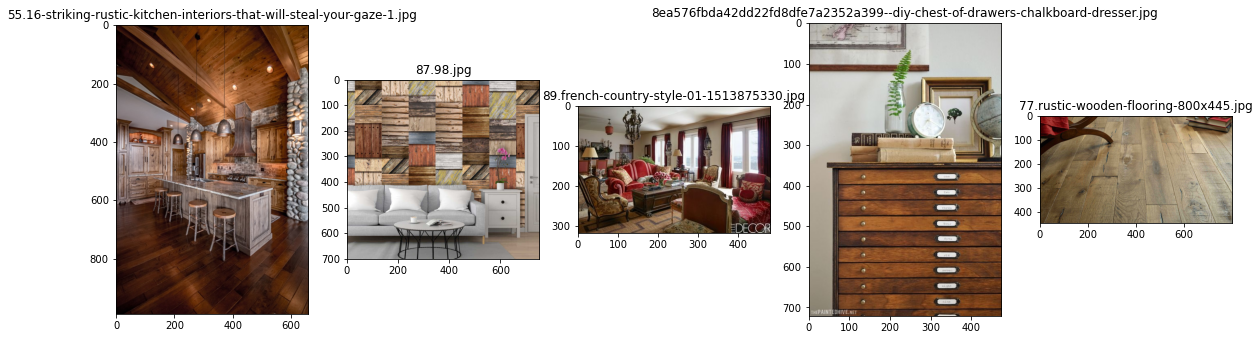

In [8]:
random_img(img_folder, class_str = '/rustic')

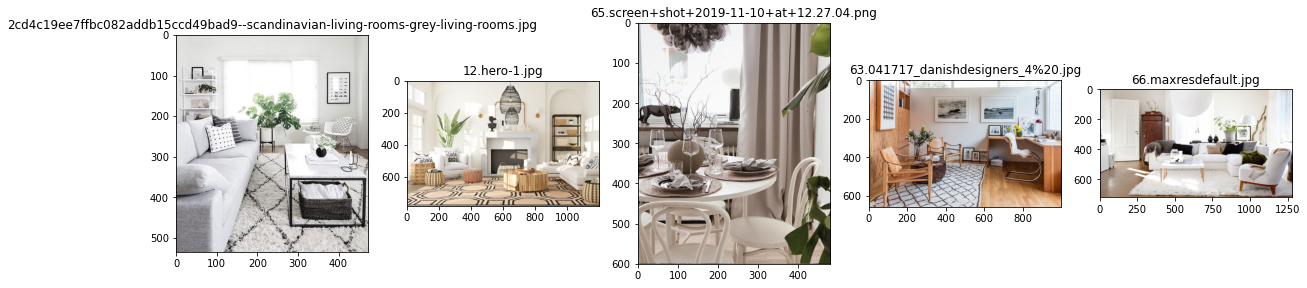

In [9]:
random_img(img_folder, class_str = '/scandinavian')

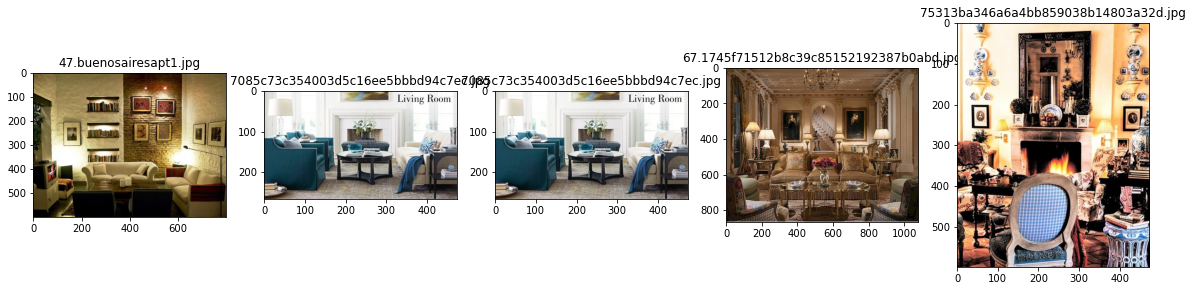

In [10]:
random_img(img_folder, class_str = '/traditional')

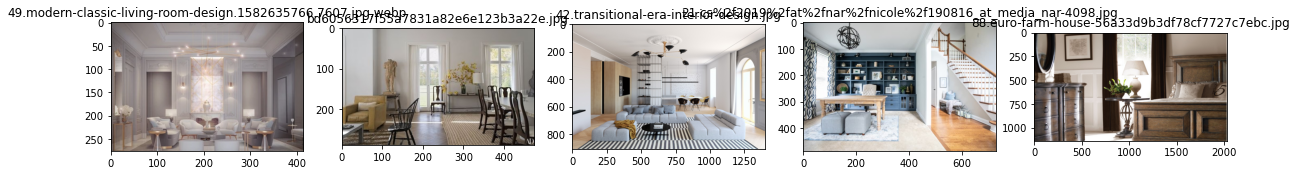

In [11]:
random_img(img_folder, class_str = '/transitional')

This function below was an attempt to figure out how to process just one image.

In [12]:
from keras.preprocessing import image


def prepare_image(img_path):

    img = image.load_img(img_path, target_size=(224, 224))
    array = image.img_to_array(img)
    x = np.expand_dims(array, axis=0)
    return x

This function creates a dataset from the corpus using each subdirectory in the corpus directory as the class names. It returns the image array and the class names. This combined the above function and this [tutorial]()

In [13]:
def create_dataset(img_folder, img_height=256, img_width=256):
    global class_name, img_data_array
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            img_path= os.path.join(img_folder, dir1,  file)
            img = image.load_img(img_path, target_size=(img_height,img_width))
            img = image.img_to_array(img)
            img /= 255 
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array, class_name

To make my life easier, the parameters were specified. The following code was created using this tensorflow [tutorial](https://www.tensorflow.org/tutorials/load_data/images#standardize_the_data) to acchieve a functioning CNN. 

In [14]:
batch_size = 32
img_height = 256
img_width = 256

In [15]:
#obtaining the training dataset
train_ds = image_dataset_from_directory(
  img_folder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2420 files belonging to 8 classes.
Using 1936 files for training.


In [16]:
#obtaining the validation dataset
val_ds = image_dataset_from_directory(
  img_folder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2420 files belonging to 8 classes.
Using 484 files for validation.


In [17]:
#from my understanding prefetching grabs data from the disk w/o having I/O blocked
#prefetch also overlaps data preprocessing and model excecution
#.cache keeps the images in memory after loading them so the dataset is not a bottleneck when training
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
#trying to get a CNN to work for the 8 classes.
model = Sequential([
        Rescaling(1./255),
        Conv2D(128, 3, activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 6, activation='relu'),
        MaxPooling2D(),
        Conv2D(32, 6, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(8)])

In [33]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
#training the model. our loss and accuracy need improvement, but at least it is functioning
model.fit(train_ds, epochs=5, verbose=1)  # track progress as we fit

Epoch 1/5
 4/61 [>.............................] - ETA: 9:09 - loss: 10.4162 - accuracy: 0.1016

KeyboardInterrupt: 

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 122, 122, 32)      36896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 32)        36896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 32)       